In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [47]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
num_cols = df.select_dtypes(include=np.number)

correlaton = num_cols.corr(method='pearson')
correlaton

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


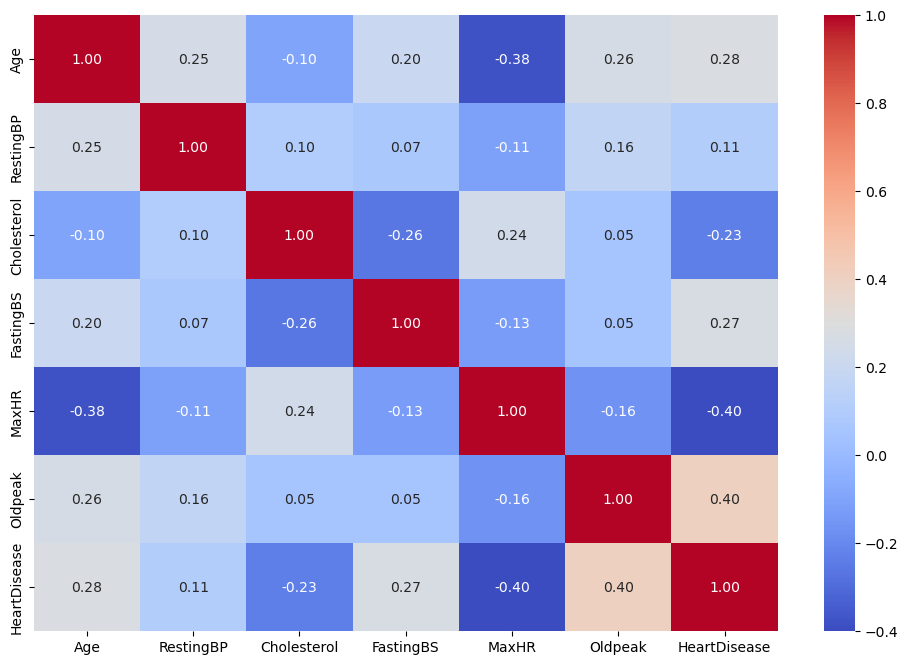

In [50]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlaton, cmap='coolwarm', annot=True,   fmt='.2f')
plt.show()

In [51]:
# scaling dataset

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
df['Sex'] = df['Sex'].map({'F':0, 'M':1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0, 'Y':1})

lst = ['ChestPainType', 'RestingECG', 'ST_Slope']
for c in lst:
    df[c] = LabelEncoder().fit_transform(df[c])


cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
for i in cols:
    df[i] = MinMaxScaler().fit_transform(df[[i]])

In [52]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.0,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,1.0,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.0,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,1.5,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.0,2,0


In [53]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [54]:
# Split the data into 80% training and 20% testing.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
# Building an MLP model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(11, )),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'), 
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5738 - loss: 0.6857   
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 0.6716 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7805 - loss: 0.6440 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.6082 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7582 - loss: 0.5766 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8078 - loss: 0.5247 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8207 - loss: 0.4898 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8408 - loss: 0.4283 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.4093 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.3829 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8365 - loss: 0.3679 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob>=0.5).astupe(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [58]:
print(y_pred)

[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [59]:
# Evaluateing the model using accuracy, roc, confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, y_pred)
con_matrixs = confusion_matrix(y_test, y_pred)

print(f'Accuracy score: {accuracy:.3f}')
print(f'Confusion matrix \n{con_matrixs}')

Accuracy score: 0.853
Confusion matrix 
[[67 10]
 [17 90]]


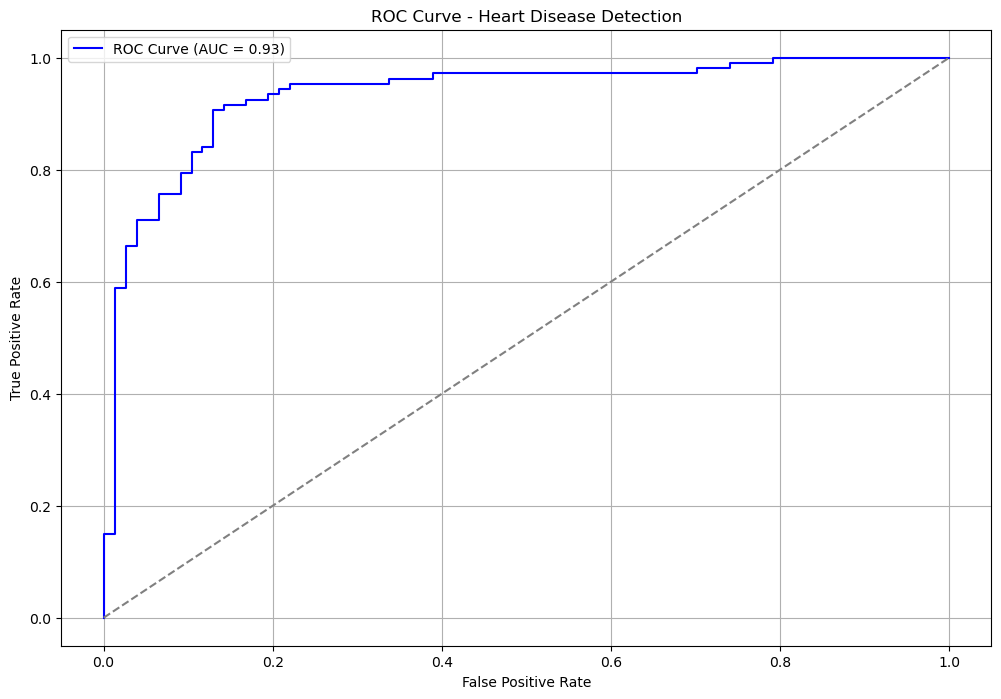

In [60]:
roc_score = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 0])

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Heart Disease Detection')
plt.legend()
plt.grid(True)
plt.show()

## Using RandomForestClassifier model

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [62]:

grid_params = {
    'n_estimators':[10, 200],
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2], 
    'bootstrap':[True, False]
}

lr = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=grid_params,
    cv=5,
    scoring='f1', # you can use 'accuracy', 'roc_auc', etc
    verbose=1, 
    n_jobs=-1
)


In [63]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 200]},
             scoring='f1', verbose=1)

In [64]:
print("Best Parameters:")
print(grid_search.best_params_)

y_pred = grid_search.predict(x_test)
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [65]:
# Evaluating
accuracy = accuracy_score(y_test, y_pred)
con_matrixs = confusion_matrix(y_test, y_pred)

print(f'Accuracy score: {accuracy:.3f}')
print(f'Confusion matrix \n{con_matrixs}')

Accuracy score: 0.891
Confusion matrix 
[[68  9]
 [11 96]]


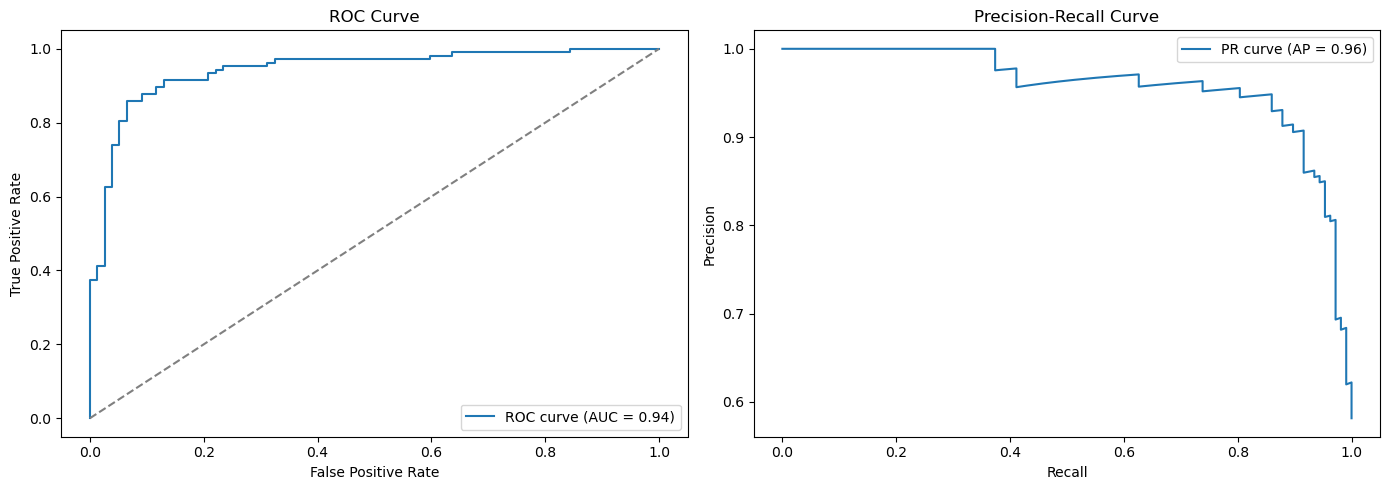

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = grid_search.predict_proba(x_test)[:, 1]

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

# Plotting
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()
